In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


urltrain = "cs-training.csv"
train = pd.read_csv(urltrain)
train = train.drop(train.iloc[:,0:1],axis=1)
Y_train = train['SeriousDlqin2yrs']
X_train = train.drop(['SeriousDlqin2yrs'], axis = 1)

In [3]:
urltest = "cs-test.csv"
test = pd.read_csv(urltest)
test = test.drop(columns = {"SeriousDlqin2yrs"}, axis = 1)
X_test = test.drop(test.iloc[:,0:1],axis=1)

In [4]:
url_test_labels = "sampleEntry.csv"
label_proba = pd.read_csv(url_test_labels)
label_proba = label_proba.drop(label_proba.iloc[:, 0:1],axis = 1).values
Y_test = []
for i in label_proba:
  if(i > 0.5):
    Y_test.append(1)
  else:
    Y_test.append(0)

X_test['labels'] = Y_test

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

X_test = X_test.dropna()

Y_test = X_test['labels']
X_test = X_test.drop(['labels'], axis = 1)


sc = StandardScaler()
sc = sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state = 0)

/Users/ashwinsheoran/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Accuracy Score For Train (max depth = 4) : 0.9362380952380952
Precision Score For Train (max depth = 4) : 0.9362380952380952
Recall Score For Train (max depth = 4) : 0.9362380952380952
Accuracy Score For Validate (max depth = 4) : 0.9351333333333334
Precision Score For Validate (max depth = 4) : 0.9351333333333334
Recall Score For Validate (max depth = 4) : 0.9351333333333334
Accuracy Score For Test (max depth = 4) : 0.99009828009828
Precision Score For Test (max depth = 4) : 0.99009828009828
Recall Score For Test (max depth = 4) : 0.99009828009828

Accuracy Score For Train (max depth = 6) : 0.9381904761904762
Precision Score For Train (max depth = 6) : 0.9381904761904762
Recall Score For Train (max depth = 6) : 0.9381904761904762
Accuracy Score For Validate (max depth = 6) : 0.9364888888888889
Precision Score For Validate (max depth = 6) : 0.9364888888888889
Recall Score For Validate (max depth = 6) : 0.9364888888888889
Accuracy Score For Test (max depth = 6) : 0.9936486486486487
Prec

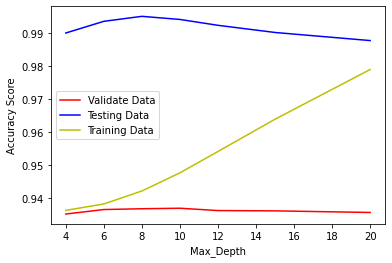

In [5]:
arr = [4,6,8,10,12,15,20]
train_plot = []
test_plot = []
validate_plot = []
for i in arr:
  model = RandomForestClassifier(max_depth=i, random_state=0)
  model.fit(X_train,Y_train)
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  pred_validate = model.predict(X_val)
  accuracy_score_train = accuracy_score(Y_train,pred_train)
  recall_score_train = recall_score(Y_train,pred_train,average = "micro")
  precision_score_train = precision_score(Y_train,pred_train,average = "micro")
  accuracy_score_validate = accuracy_score(Y_val,pred_validate)
  recall_score_validate = recall_score(Y_val,pred_validate,average = "micro")
  precision_score_validate = precision_score(Y_val,pred_validate,average = "micro")
  accuracy_score_test = accuracy_score(Y_test,pred_test)
  recall_score_test = recall_score(Y_test,pred_test,average = "micro")
  precision_score_test = precision_score(Y_test,pred_test,average = "micro")
  validate_plot.append(accuracy_score_validate)
  test_plot.append(accuracy_score_test)
  train_plot.append(accuracy_score_train)
  print("Accuracy Score For Train (max depth = " + str(i) + ") : " + str(accuracy_score_train))
  print("Precision Score For Train (max depth = " + str(i) + ") : " + str(precision_score_train))
  print("Recall Score For Train (max depth = " + str(i) + ") : " + str(recall_score_train))
  print("Accuracy Score For Validate (max depth = " + str(i) + ") : " + str(accuracy_score_validate))
  print("Precision Score For Validate (max depth = " + str(i) + ") : " + str(precision_score_validate))
  print("Recall Score For Validate (max depth = " + str(i) + ") : " + str(recall_score_validate))
  print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
  print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
  print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
  print()
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy Score")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,train_plot,'y',label = "Training Data")
plt.legend()

Accuracy Score For Train (max depth = 8) : 0.9421238095238095
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     98009
           1       0.76      0.19      0.30      6991

    accuracy                           0.94    105000
   macro avg       0.85      0.59      0.64    105000
weighted avg       0.93      0.94      0.93    105000



<AxesSubplot:>

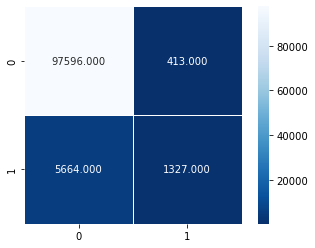

In [6]:
model = RandomForestClassifier(max_depth=8, random_state=0)
model.fit(X_train,Y_train)
pred_train = model.predict(X_train)
accuracy_score_train = accuracy_score(Y_train,pred_train)
print("Accuracy Score For Train (max depth = " + str(8) + ") : " + str(accuracy_score_train))
print(classification_report(Y_train,pred_train))
cm = confusion_matrix(Y_train,pred_train)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

Accuracy Score For Validate (max depth = 8) : 0.9367333333333333
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     41965
           1       0.64      0.15      0.24      3035

    accuracy                           0.94     45000
   macro avg       0.79      0.57      0.60     45000
weighted avg       0.92      0.94      0.92     45000



<AxesSubplot:>

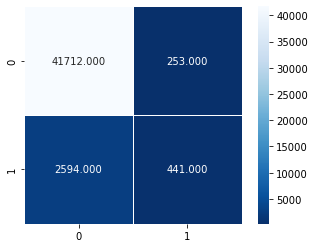

In [7]:
pred_validate = model.predict(X_val)
accuracy_score_validate = accuracy_score(Y_val,pred_validate)
print("Accuracy Score For Validate (max depth = " + str(8) + ") : " + str(accuracy_score_validate))
print(classification_report(Y_val,pred_validate))
cm = confusion_matrix(Y_val,pred_validate)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

Accuracy Score For Testing (max depth = 8) : 0.9951597051597052
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80040
           1       0.88      0.82      0.85      1360

    accuracy                           1.00     81400
   macro avg       0.94      0.91      0.92     81400
weighted avg       1.00      1.00      1.00     81400



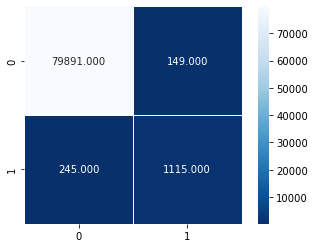

In [8]:
pred_test = model.predict(X_test)
accuracy_score_test = accuracy_score(Y_test,pred_test)
print("Accuracy Score For Testing (max depth = " + str(8) + ") : " + str(accuracy_score_test))
print(classification_report(Y_test,pred_test))
cm = confusion_matrix(Y_test,pred_test)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

In [9]:
model.feature_importances_

array([0.19763084, 0.04022051, 0.14075023, 0.03789127, 0.03024856,
       0.02896987, 0.34008061, 0.01307536, 0.16096475, 0.01016799])

<BarContainer object of 10 artists>

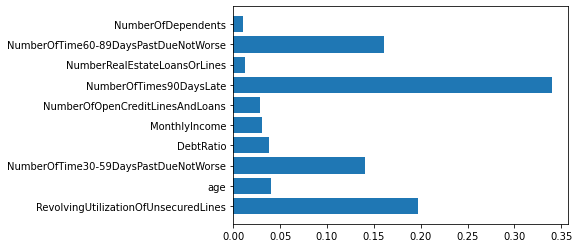

In [10]:
arr = ["RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]
plt.barh(arr,model.feature_importances_)

Accuracy Score For Test (max depth = 1) : 0.9251474201474201
Precision Score For Test (max depth = 1) : 0.9251474201474201
Recall Score For Test (max depth = 1) : 0.9251474201474201

Accuracy Score For Test (max depth = 2) : 0.9275184275184275
Precision Score For Test (max depth = 2) : 0.9275184275184275
Recall Score For Test (max depth = 2) : 0.9275184275184275

Accuracy Score For Test (max depth = 3) : 0.9264619164619164
Precision Score For Test (max depth = 3) : 0.9264619164619164
Recall Score For Test (max depth = 3) : 0.9264619164619164

Accuracy Score For Test (max depth = 4) : 0.9196805896805896
Precision Score For Test (max depth = 4) : 0.9196805896805896
Recall Score For Test (max depth = 4) : 0.9196805896805896

Accuracy Score For Test (max depth = 5) : 0.9175429975429975
Precision Score For Test (max depth = 5) : 0.9175429975429975
Recall Score For Test (max depth = 5) : 0.9175429975429975

Accuracy Score For Test (max depth = 6) : 0.9327886977886978
Precision Score For Test

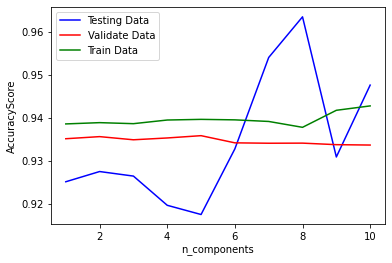

In [12]:
arr = [1,2,3,4,5,6,7,8,9,10]
test_plot = []
validate_plot = []
train_plot = []
for i in arr:
    clf = PCA(n_components = i)
    X_train2 = clf.fit_transform(X_train)
    X_valid2 = clf.fit_transform(X_val)
    X_test2 = clf.fit_transform(X_test)
    clf = RandomForestClassifier(max_depth=8, random_state=0)
    clf.fit(X_train2, Y_train)
    pred_test = clf.predict(X_test2)
    pred_val = clf.predict(X_valid2)
    pred_train = clf.predict(X_train2)
    score = clf.score(X_test2, Y_test)
    accuracy_score_test = accuracy_score(Y_test,pred_test)
    recall_score_test = recall_score(Y_test,pred_test,average = "micro")
    precision_score_test = precision_score(Y_test,pred_test,average = "micro")
    test_plot.append(accuracy_score_test)

    recall_score_validate = recall_score(Y_val, pred_val, average = "micro")
    precision_score_validate = precision_score(Y_val, pred_val, average = "micro")
    accuracy_score_validate = accuracy_score(Y_val, pred_val)
    validate_plot.append(accuracy_score_validate)

    recall_score_train = recall_score(Y_train, pred_train, average = "micro")
    precision_score_train = precision_score(Y_train, pred_train, average = "micro")
    accuracy_score_train = accuracy_score(Y_train, pred_train)
    train_plot.append(accuracy_score_train)
    print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
    print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
    print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
    print()
plt.xlabel("n_components")
plt.ylabel("AccuracyScore")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,train_plot,'g',label = "Train Data")
plt.legend()
